In [17]:
# import sys  
# !{sys.executable} -m pip install --user pandas matplotlib.pyplot numpy scipy.stats
import pandas 
import matplotlib.pyplot
import numpy
import re
import itertools

In [18]:
df = pandas.read_csv("DataEngineer.csv")
df.to_json("DataEngineer.json")

C:\Users\gidro\AppData\Local\Temp\ipykernel_14596\3290444783.py:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(quantity_of_companies, fontsize=7)


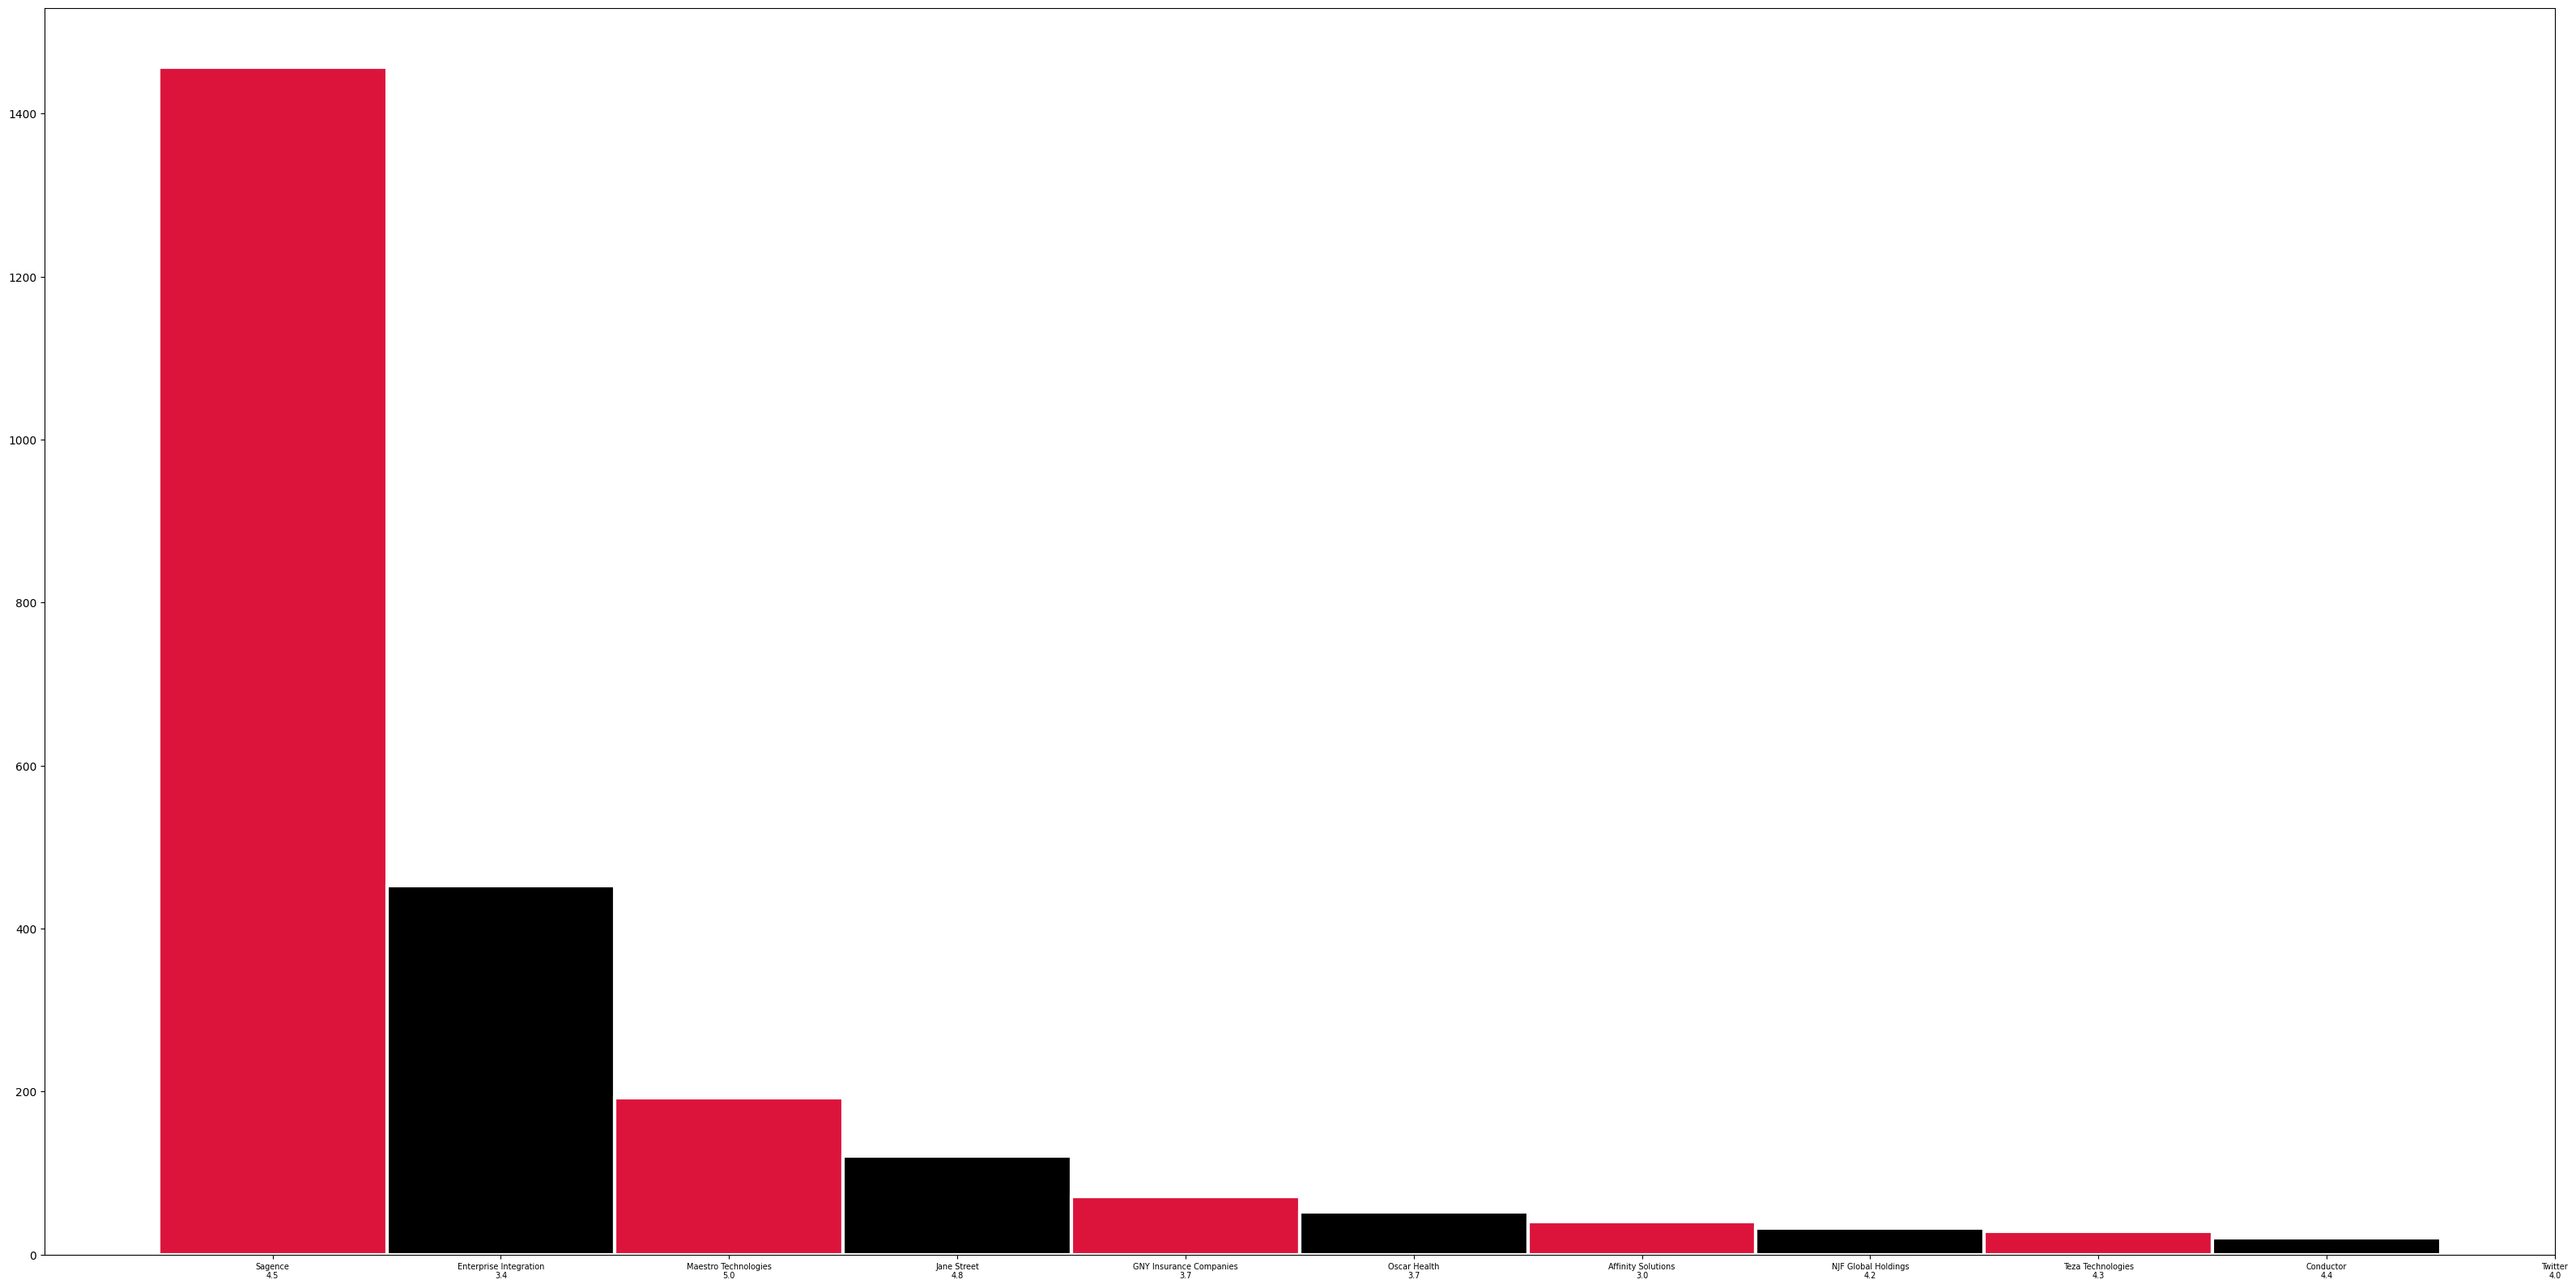

In [19]:
g1 = df.groupby("Company Name", group_keys=False).cumcount()
quantity_of_companies = []
quantity_by_companies = {}
count = 0
for company in g1:
    if df.at[company, "Company Name"] in quantity_by_companies:
        quantity_by_companies[df.at[company, "Company Name"]] += 1
    else:
        quantity_by_companies[df.at[company, "Company Name"]] = 1
        quantity_of_companies.append(count)
        count+=1

fig, ax = matplotlib.pyplot.subplots(figsize=(40,20))
ax.set_xticklabels(quantity_of_companies, fontsize=7)
bar_colors = ['crimson', 'black']
matplotlib.pyplot.xticks(quantity_of_companies, quantity_by_companies.keys())
ax.bar(quantity_of_companies[0:10], dict(itertools.islice(quantity_by_companies.items(), 10)).values(), width=1, edgecolor="white", linewidth=3, color=bar_colors)
matplotlib.pyplot.show()

C:\Users\gidro\AppData\Local\Temp\ipykernel_14596\1179279675.py:15: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(dict(itertools.islice(quantity_by_titles.items(), 10)).keys(), fontsize=10)


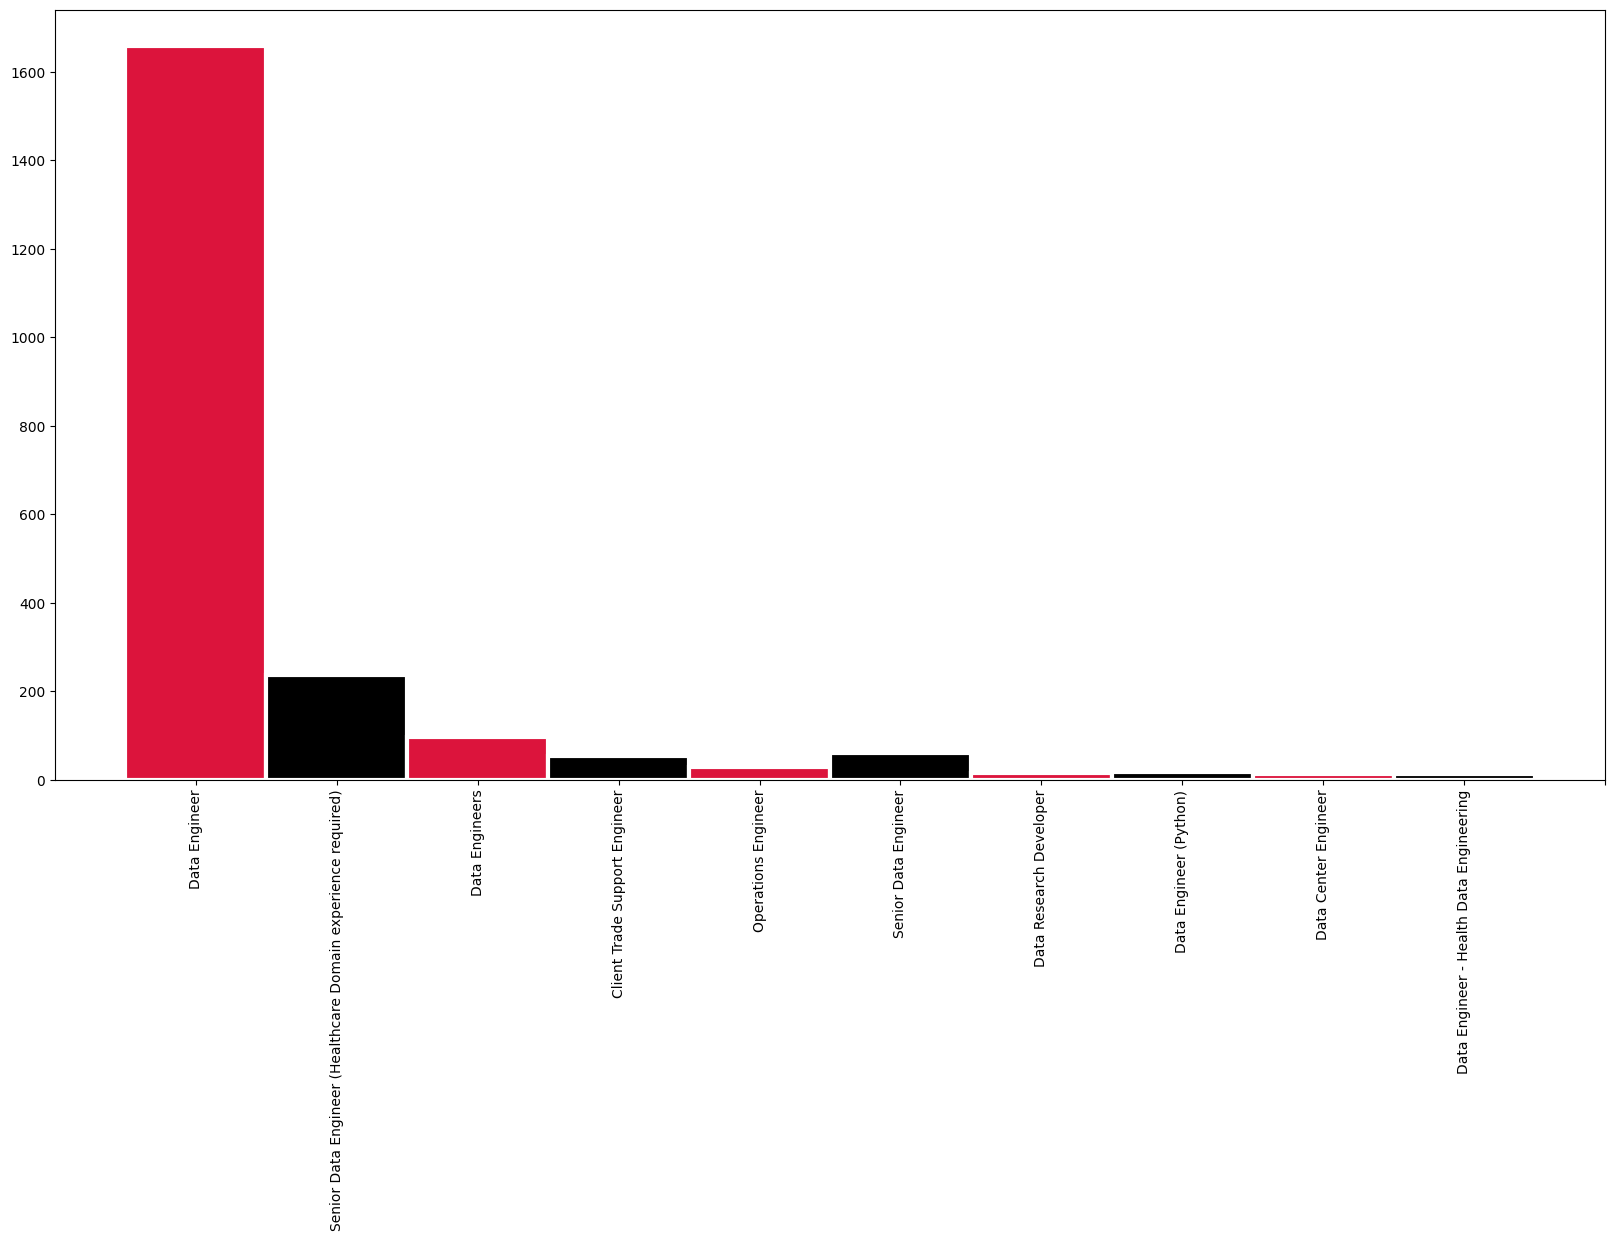

In [20]:
g2 = df.groupby("Job Title", group_keys=False).cumcount()
quantity_of_titles = []
quantity_by_titles = {}
count = 1
for title in g2:
    if df.at[title, "Job Title"] in quantity_by_titles:
        quantity_by_titles[df.at[title, "Job Title"]] += 1
    else:
        quantity_by_titles[df.at[title, "Job Title"]] = 1
        quantity_of_titles.append(count)
        count+=1
        
fig, ax = matplotlib.pyplot.subplots(figsize=(20,10))
ax.tick_params(axis='x', rotation=90)
ax.set_xticklabels(dict(itertools.islice(quantity_by_titles.items(), 10)).keys(), fontsize=10)
bar_colors = ['crimson', 'black']
matplotlib.pyplot.xticks(quantity_of_titles)
ax.bar(quantity_of_titles[0:10], dict(itertools.islice(quantity_by_titles.items(), 10)).values(), width=1, edgecolor="white", linewidth=3, color=bar_colors)
matplotlib.pyplot.show()

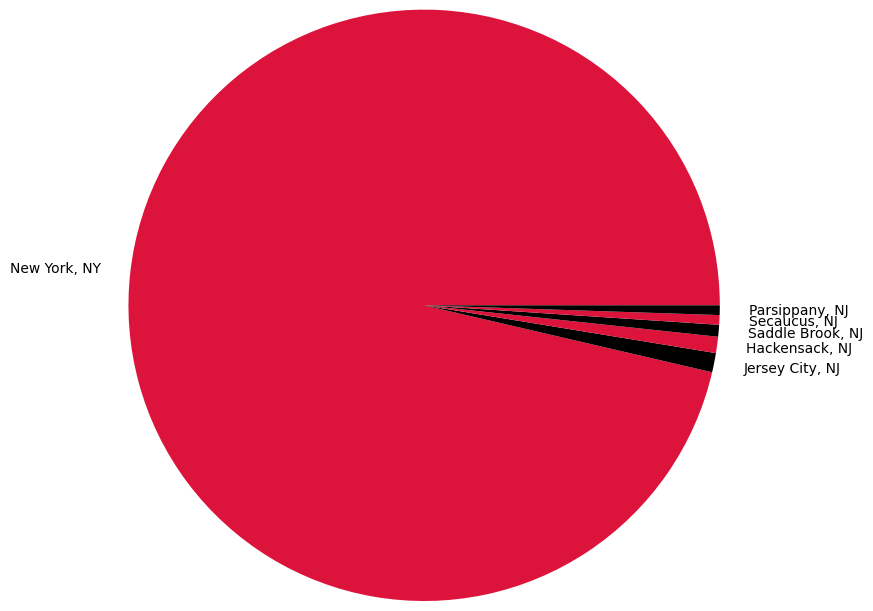

In [21]:
Locations = {}
g3 = df.groupby("Location", group_keys=False).cumcount()

for location in g3:
    if df.at[location, "Location"] in Locations:
        Locations[df.at[location, "Location"]] += 1
    else:
        Locations[df.at[location, "Location"]] = 1
        count+=1

fig, ax = matplotlib.pyplot.subplots()
ax.pie(dict(itertools.islice(Locations.items(), 6)).values(), labels=dict(itertools.islice(Locations.items(), 6)).keys(), radius=2, colors= ['crimson', 'black'])
matplotlib.pyplot.show()

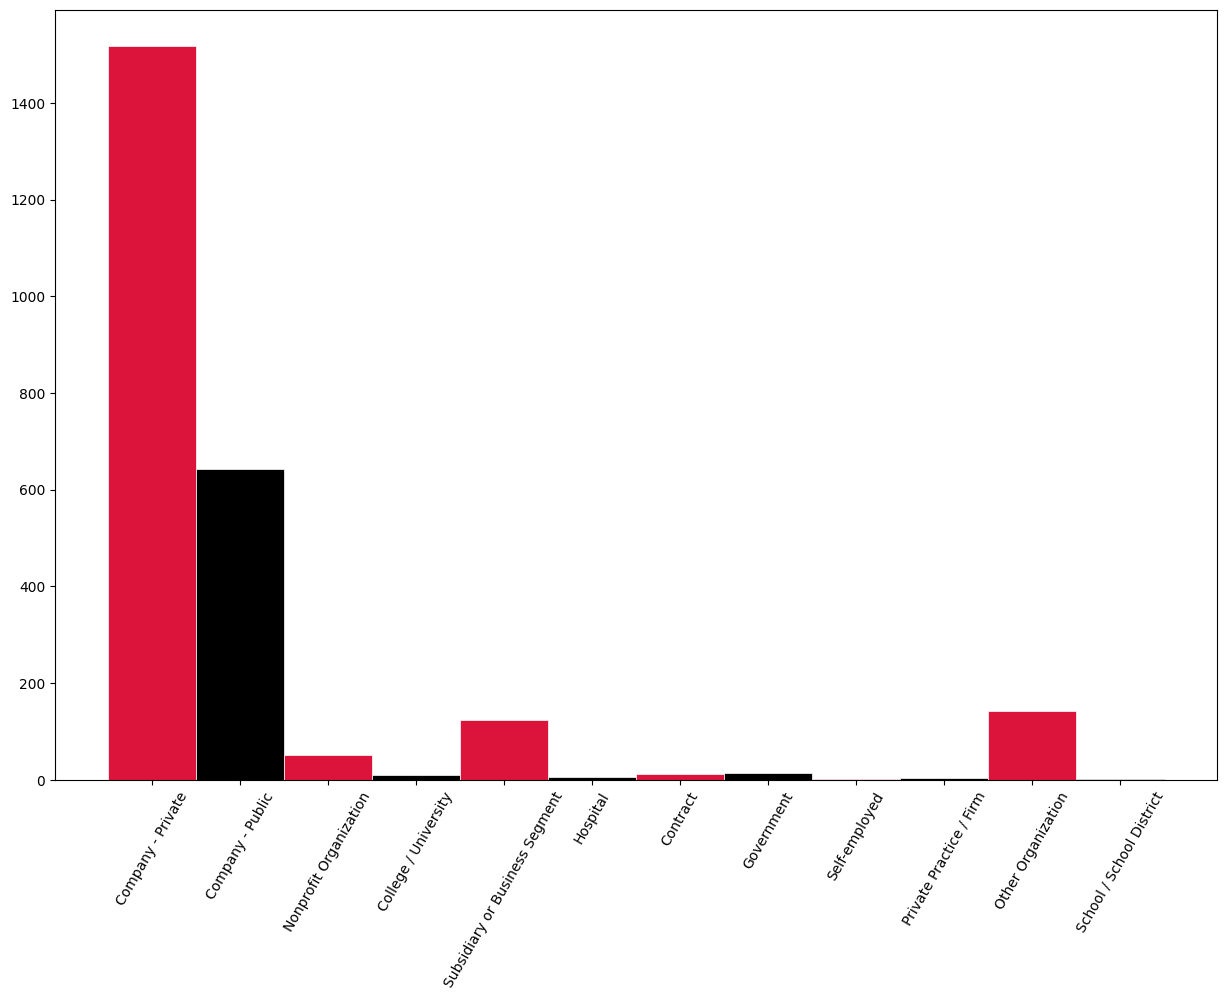

In [22]:
types_of_ownership = {}
g4 = df.groupby("Type of ownership", group_keys=False).cumcount()
for type in g4:
    if df.at[type, "Type of ownership"] in types_of_ownership:
        types_of_ownership[df.at[type, "Type of ownership"]] += 1
    else:
        types_of_ownership[df.at[type, "Type of ownership"]] = 1
        count+=1
types_of_ownership["Other Organization"] = types_of_ownership["Other Organization"] + types_of_ownership["-1"] + types_of_ownership["Unknown"]
types_of_ownership.pop("-1")
types_of_ownership.pop("Unknown")
fig, ax = matplotlib.pyplot.subplots(figsize=(15,10))
ax.tick_params(axis='x', rotation=60)
ax.bar(types_of_ownership.keys(), types_of_ownership.values(), width=1, edgecolor="white", linewidth=0.5, color = ['crimson', 'black'])
matplotlib.pyplot.show()

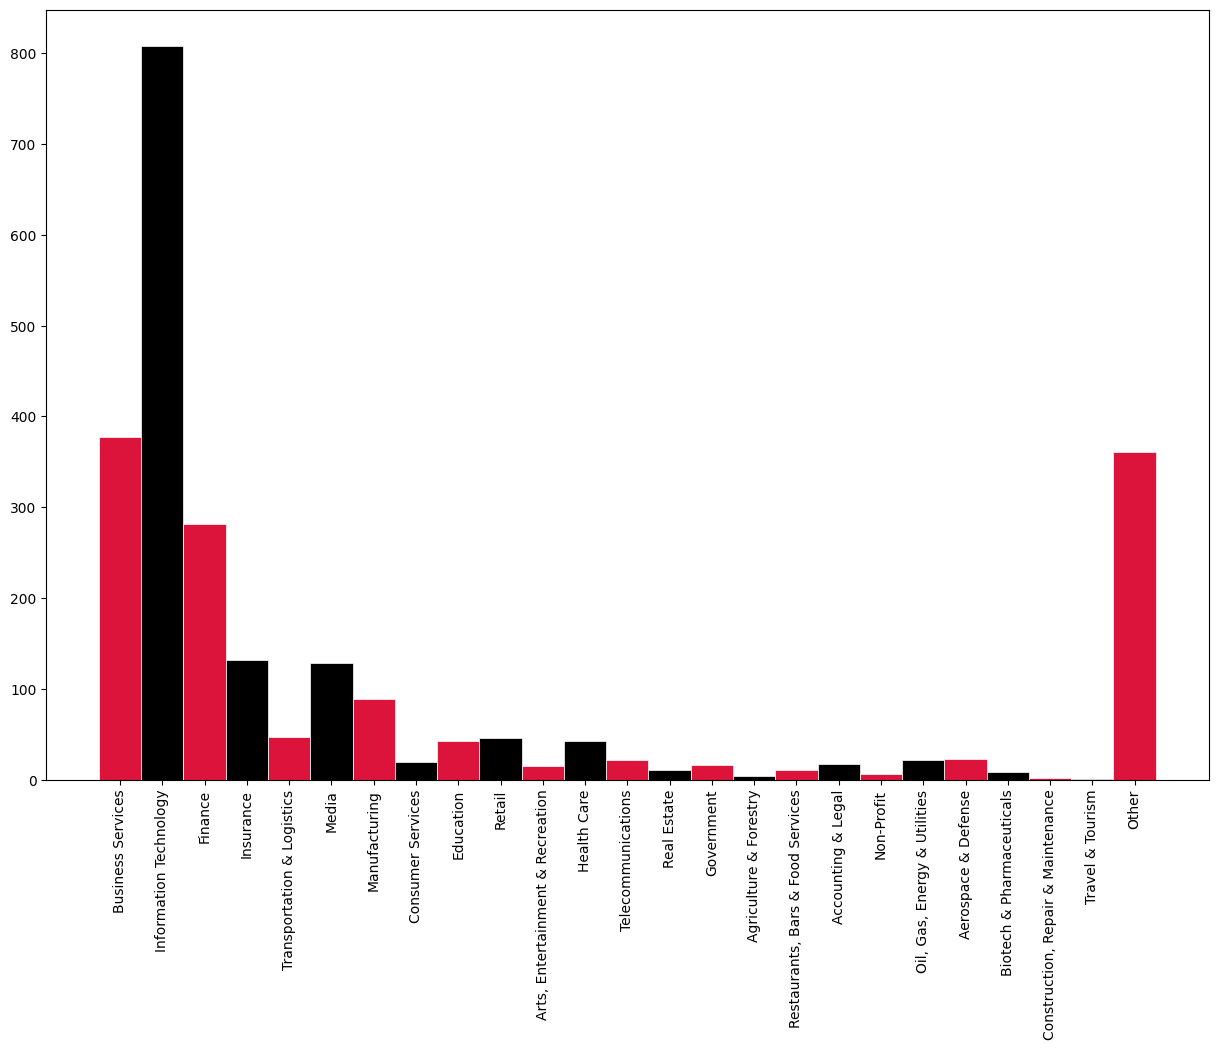

In [23]:
sectors = {}
g5 = df.groupby("Sector", group_keys=False).cumcount()
for sector in g5:
    if df.at[sector, "Sector"] in sectors:
        sectors[df.at[sector, "Sector"]] += 1
    else:
        sectors[df.at[sector, "Sector"]] = 1
sectors["Other"] = sectors["-1"]
sectors.pop("-1")
fig, ax = matplotlib.pyplot.subplots(figsize=(15,10))
ax.tick_params(axis='x', rotation=90)
ax.bar(sectors.keys(), sectors.values(), width=1, edgecolor="white", linewidth=0.5, color = ['crimson', 'black'])
matplotlib.pyplot.show()

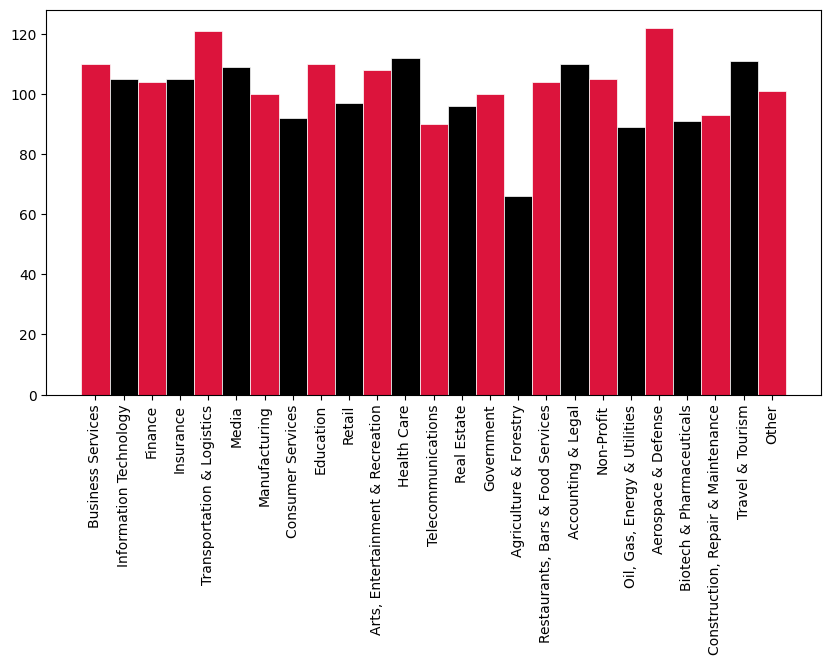

In [24]:
sectors = {}
salaries = {}
g6 = df.groupby("Sector", group_keys=False).cumcount()
for sector in g6:
    salary = df.at[sector, "Salary Estimate"].replace(" (Glassdoor est.)", "").replace("$", "").replace("K", "").split("-")
    salary = (int(salary[0]) + int(salary[1]))/2
    if df.at[sector, "Sector"] in sectors:
        sectors[df.at[sector, "Sector"]] += 1
        salaries[df.at[sector, "Sector"]] = salaries[df.at[sector, "Sector"]] + salary
    else:
        salaries[df.at[sector, "Sector"]] =  salary
        sectors[df.at[sector, "Sector"]] = 1

sectors["Other"] = sectors["-1"]
salaries["Other"] = salaries["-1"]
sectors.pop("-1")
salaries.pop("-1")
for salary in salaries:
    salaries[salary] = int(salaries[salary]/sectors[salary])

fig, ax = matplotlib.pyplot.subplots(figsize=(10,5))
ax.tick_params(axis='x', rotation=90)
ax.bar(sectors.keys(), salaries.values(), width=1, edgecolor="white", linewidth=0.5, color = ['crimson', 'black'])
matplotlib.pyplot.show()

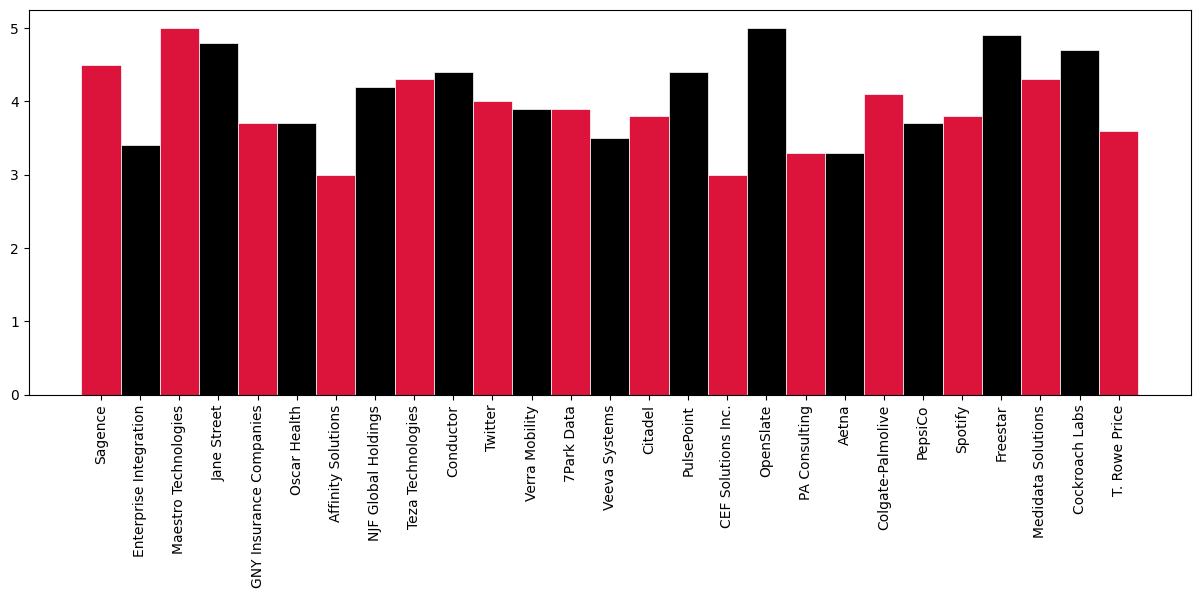

In [25]:
companies_rate = {}
g7 = df.groupby("Company Name", group_keys=False).cumcount()
for company in g7:
        companies_rate[df.at[company, "Company Name"]] = df.at[company, "Rating"]

fig, ax = matplotlib.pyplot.subplots(figsize=(15,5))
ax.tick_params(axis='x', rotation=90)
ax.bar([re.sub(r'\n\d{1}\.{1}\d{1}', "", company) for company in companies_rate.keys()], companies_rate.values(), width=1, edgecolor="white", linewidth=0.5, color = ['crimson', 'black'])

matplotlib.pyplot.show()

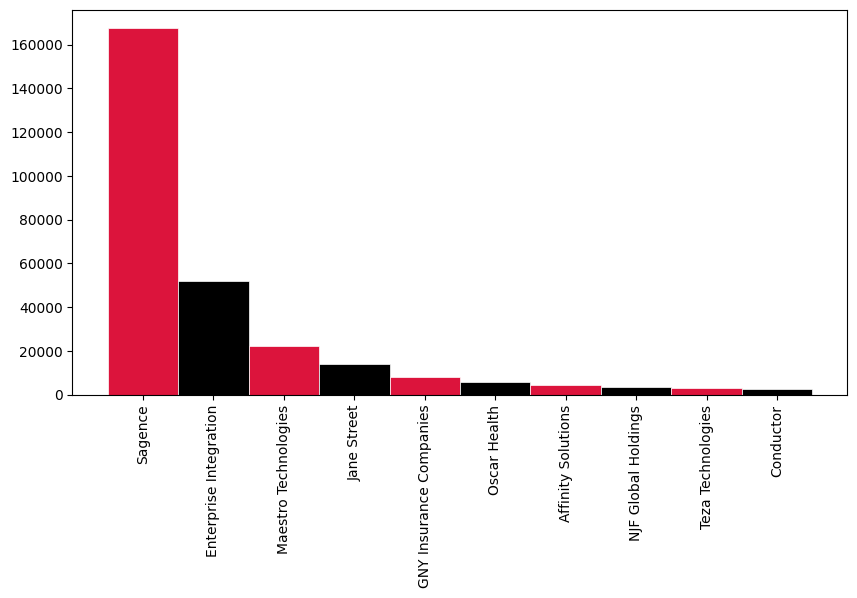

In [26]:
companies = {}
salaries = {}
g6 = df.groupby("Company Name", group_keys=False).cumcount()
for company in g6:
    salary = df.at[company, "Salary Estimate"].replace(" (Glassdoor est.)", "").replace("$", "").replace("K", "").split("-")
    salary = (int(salary[0]) + int(salary[1]))/2
    if df.at[company, "Company Name"] in companies:
        companies[df.at[company, "Company Name"]] += 1
        salaries[df.at[company, "Company Name"]] = salaries[df.at[company, "Company Name"]] + salary
    else:
        salaries[df.at[company, "Company Name"]] =  salary
        companies[df.at[company, "Company Name"]] = 1

for salary in salaries:
    salary = int(salaries[salary]/companies[salary])

fig, ax = matplotlib.pyplot.subplots(figsize=(10,5))
ax.tick_params(axis='x', rotation=90)
ax.bar([re.sub(r'\n\d{1}\.{1}\d{1}', "", company) for company in dict(itertools.islice(companies.items(),10)).keys()], dict(itertools.islice(salaries.items(),10)).values(), width=1, edgecolor="white", linewidth=0.5, color = ['crimson', 'black'])
matplotlib.pyplot.show()

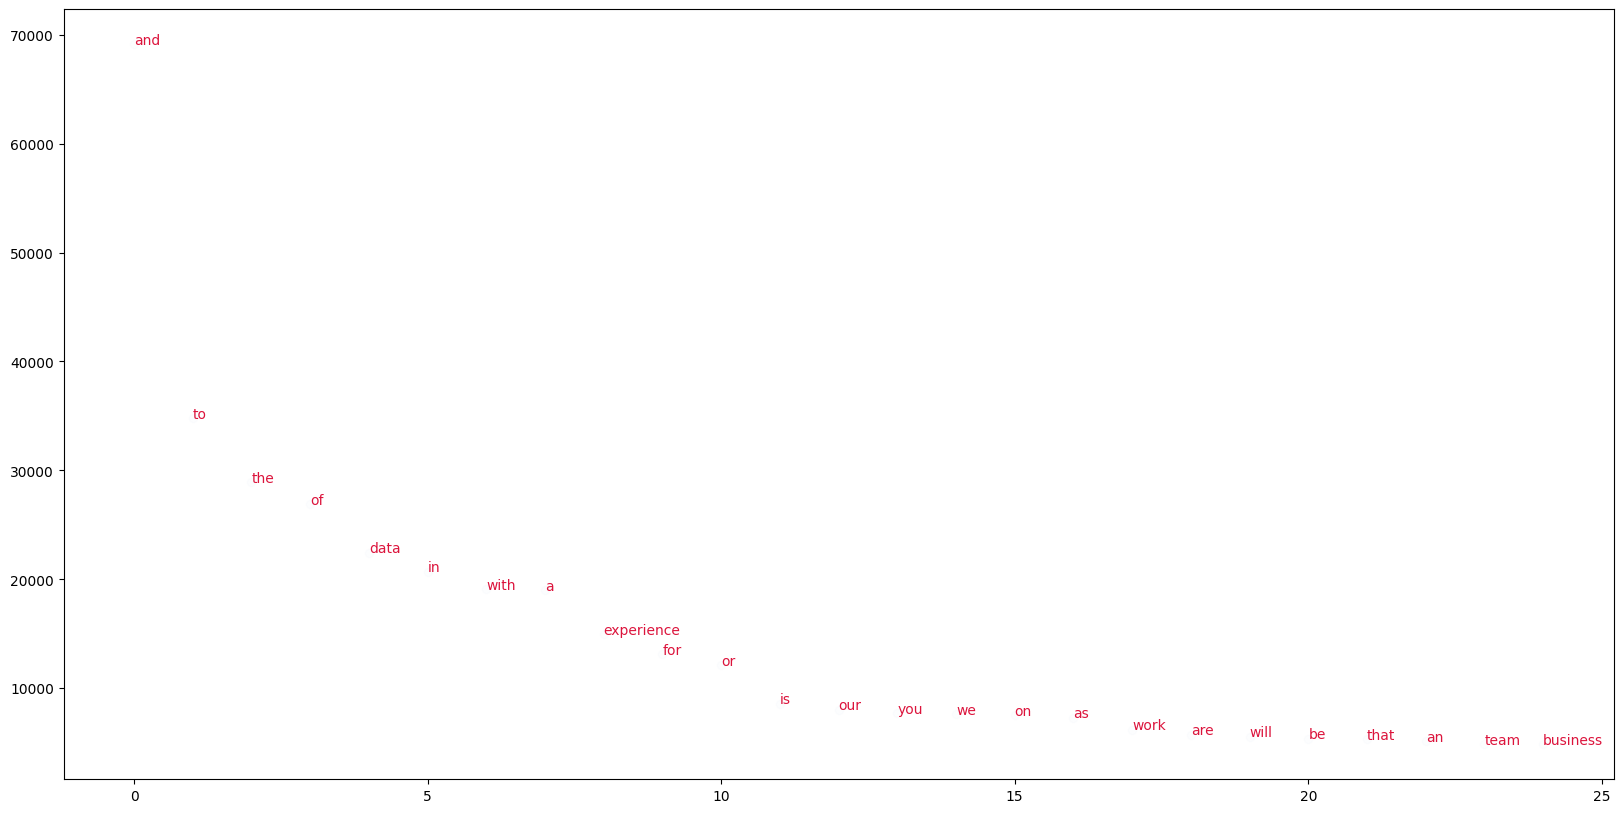

In [27]:
words = {}
sorted_words = {}
for description in df["Job Description"]:
    for word in re.findall( '(\w*)|[^\s\d\W\\n]', description):
        if word.lower() in words:
            words[word.lower()] =  words[word.lower()] + 1
        else:
            words[word.lower()] = 1

words.pop("")
for word in sorted(words.items(), key=lambda x:x[1], reverse=True)[:25]:
    sorted_words["%s" % word[0]] = word[1]

fig, ax = matplotlib.pyplot.subplots(figsize=(20,10))
ax.scatter(numpy.arange(0, 25), sorted_words.values(), alpha=0.01)

for i, txt in enumerate(sorted_words):
    ax.annotate(txt, (numpy.arange(0, 25)[i], list(sorted_words.values())[i]), fontsize=10, color = 'crimson')

matplotlib.pyplot.show()